# Задача №1
Для выборки студентов оценить эффективность курса по оценкам за тест.

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sns
import pandas as pd

Откроем и посмотрим, как устроены данные:

In [3]:
data = pd.read_csv('students.txt')#, delimiter=',')
data

,Time Student Score
0,Before a 65
1,Before b 75
2,Before c 86
3,Before d 69
4,Before e 60
5,Before f 81
6,Before g 88
7,Before h 53
8,Before i 75
9,Before j 73


Разобьем данные на две выборки "до" и "после":

In [4]:
before = []
for i in range(0,10):
    before.append(int(data.loc[i][0].split()[2]))
before = np.array(before)

In [5]:
after = []
for i in range(10,20):
    after.append(int(data.loc[i][0].split()[2]))
after = np.array(after)

Text(0, 0.5, 'After')

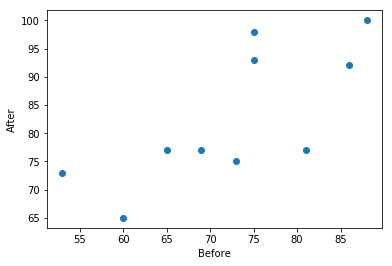

In [15]:
plt.scatter(before, after)
plt.xlabel('Before')
plt.ylabel('After')

In [ ]:
Убедимся, что выборки имеют нормальное распределение. Для этого проверим критерий Шапиро-Уилкоксона:

In [6]:
st.shapiro(before)

(0.9717550873756409, 0.9066238403320312)

In [7]:
st.shapiro(after)

(0.8962869644165039, 0.19936728477478027)

Отвергнуть гипотезу о нормальном распределении обеих выборок мы не можем, так что проверим t-тестом, есть ли прогресс.

In [39]:
st.ttest_ind(before, after)

Ttest_indResult(statistic=-1.9741524634355638, pvalue=0.06391252653089978)

Хотя p-value и очень мал, гипотезу о равенстве средних отвергнуть не получится. Но так как распределение второй выборки и так с натяжкой можно было назвать нормальным, проверим еще и перестановочным тестом.

In [9]:
from permute.core import one_sample
one_sample(after, before)

(0.00259, 10.2)

И теперь уже хорошо видно, что в среднем, после прохождения курса студенты улучшили свои показатели.
Теперь посчитаем cohen's d:

In [11]:
def cohen_d(arr1, arr2):
    n1 = arr1.shape[0]
    n2 = arr2.shape[0]
    s1 = np.sum((arr1 - arr1.mean())**2)/n1
    s2 = np.sum((arr2 - arr2.mean())**2)/n2
    s = (((n1 - 1)*s1 + (n2 - 1)*s2)/(n1 + n2 - 2))**0.5
    return (arr1.mean() - arr2.mean())/s

In [12]:
cohen_d(after, before)

0.9306243959942767

Как видим, эффект достаточно большой, так что можно смело говорить, что курс можно считать полезным.